# Exercise sheet 8 solution

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

# 1 (8 points)
We define a random variable $X_\text{mean}$ as follows:
$$
X_\text{mean} = \dfrac{1}{N} \sum_{i=1}^N X_i 
$$
Where $X_i \sim$ Binomial($n,p$). As discussed in the last lecture, we can analytically compute the mean and variance of this random variable:
$$
\mathbb{E}[X_\text{mean}] = \dfrac{1}{N} \sum_{i=1}^N \mathbb{E}[X_i] = np
$$
$$
\text{Var}[X_\text{mean}] = \dfrac{1}{N^2} \sum_{i=1}^N \text{Var}[X_i] = \dfrac{np(1-p)}{N}
$$
In this exercise, we want to verify the analytical results experimentally.
As the first step, let's define a Binomial random variable:

In [4]:
n = 20 # The total number of trials
p = 0.5 # The probability of success in each trial
X = stats.binom(n, p)
# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.binom.html#scipy.stats.binom

### 1a (2 points)
Now generate a matrix with size $m \times N$ containing samples from the given Binomial distribution (call it $x$). Then calculate the mean of each row of this matrix and make a vector with size $m$ and call it mean ($m$ random samples of $X_\text{mean}$). Plot the histogram of the calculated means.

**Important**: Please do not make a new cell for the plot. Plot the histogram in the same cell.

**Important**: Please do not use a "for-loop" for sample generation; X.rvs can take the shape of the matrix and generate it.

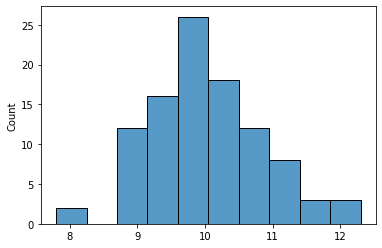

In [5]:
m = 100
N = 10
np.random.seed(0)

x = X.rvs([m,N])
mean = x.mean(axis = 1)
sns.histplot(mean)

In [6]:
print(mean.mean())
print(mean.std())
assert_equal(len(x), m)
assert_almost_equal(mean.mean(), 9.983 , places=2)
assert_almost_equal(mean.std() , 0.836 , places=2)

9.983
0.8363079576328329


### 1b (4 points)
Now we want to repeat this process for $N=\{1,2,...,k\}$ instead of a single $N=10$. So write a code to generate the mean for each $N$ (as you did for $N=10$) and store all the calculated means in "means" which would be a matrix with size $k \times m$.

**Important**: Please do not use a "for-loop" for sample generation; X.rvs can take the shape of the matrix and generate it. You can use "for-loop" anywhere else.

In [7]:
m = 100
k = 50
np.random.seed(0)
means = np.zeros([k,m])

for i in range(k):
    x = X.rvs([m,i+1])
    means[i] = x.mean(axis = 1)


In [8]:
print(len(means))
print(means.mean())
print(means.std())
assert_equal(len(means), k)
assert_almost_equal(means.mean(), 9.992 , places=2)
assert_almost_equal(means.std() , 0.677 , places=2)

50
9.992003355663684
0.6777692980147271


### 1c (2 points)
Now calculate the variance of each mean and store the variances in a vector with size k and call it variences. Plot the histogram of variences for $N=\{1,2,...,k\}$.

**Important**: Please do not make a new cell for the plot. Plot the histogram in the same cell.

(50,)


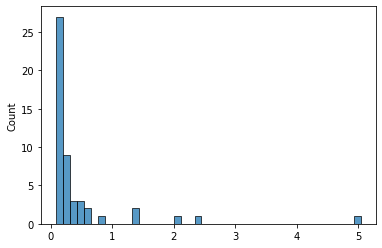

In [9]:
variances = np.var(means , axis = 1)
print(variances.shape)
sns.histplot(variances)

In [10]:
print(variances.mean())
print(variances.var())

assert_almost_equal(variances.mean(), 0.455 , places=2)
assert_almost_equal(variances.var(), 0.646 , places=2)

0.45548466490645645
0.6463863675528132


Does the variance decrease as we increase the number of samples ($N$)? Why?

# 2 (7 points)
## Confidence Interval
In this exercise, we work on confidence interval calculation using bottstrap technique.
Let's generate $N$ samples from Gaussian distribution:

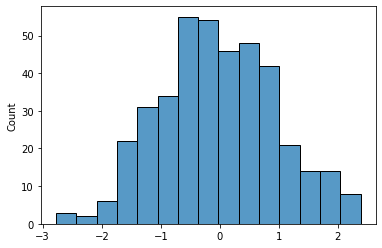

In [11]:
mu = 0.0
sigma = 1.0
N = 400

np.random.seed(0)
X = stats.norm(loc = mu , scale = sigma)
x = X.rvs(N)
sns.histplot(x)

# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

### 2a (6 points)

As discussed in the last lecture, one way to find the confidence interval is the bootstrap technique. Consider you are given $N$ samples, the confidence interval of $0.95$ using bootstrap is calculated as follows:

1. Select $N$ samples with replacements from the given samples.
2. Calculate the mean value and store it in an array
3. Repeat the process $k$ times On the array of mean values, calculate the 2.5th percentile and 97.5th percentile (if you want a 95% confidence interval)

Implement the bootstrap method and store the confidence interval in CI, a list with two values, the lower and the upper bounds.

In [12]:
k = 50
confidence = 0.95

np.random.seed(0)

values = [np.random.choice(x,size=len(x),replace=True).mean() for i in range(k)] 
CI = np.percentile(values,[100*(1-confidence)/2,100*(1-(1-confidence)/2)]) 

print("The confidence interval for N={} is: {}".format(N,CI))

The confidence interval for N=400 is: [-0.14101655  0.0730151 ]


In [13]:
print(len(CI))
print(CI[1] - CI[0])
print(CI.std())
assert_equal(len(CI), 2)
assert_almost_equal(CI[1] - CI[0], 0.21 , places=2)
assert_almost_equal(CI.std() , 0.107 , places=2)

2
0.21403165096661023
0.10701582548330511


### 2b (1 points)
Compute the confidence interval for $N = 4000$ (instead of 400) 

The confidence interval for N=4000 is: [-0.04920212  0.00565882]


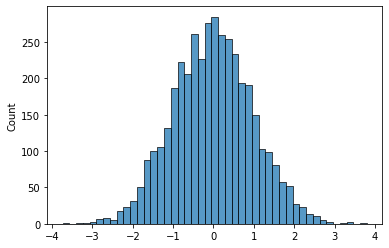

In [14]:
mu = 0.0
sigma = 1.0
N = 4000 # previously 400

np.random.seed(0)
X = stats.norm(loc = mu , scale = sigma)
x = X.rvs(N)
sns.histplot(x)

k = 50
confidence = 0.95

values = [np.random.choice(x,size=len(x),replace=True).mean() for i in range(k)] 
CI = np.percentile(values,[100*(1-confidence)/2,100*(1-(1-confidence)/2)]) 

print("The confidence interval for N={} is: {}".format(N,CI))

In [15]:
print(len(CI))
print(CI[1] - CI[0])
print(CI.std())
assert_equal(len(CI), 2)
assert_almost_equal(CI[1] - CI[0], 0.054 , places=2)
assert_almost_equal(CI.std() , 0.027 , places=2)

2
0.05486093939774029
0.027430469698870145


Does the confidencence interval shrinke by increasing the number of samples ($N$)? Why?